In [165]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from genetic_algorithm import GeneticFeatures

from sklearn import linear_model



pd.set_option('display.max_columns', None)

In [108]:
# Import data
data = pd.read_csv('/Users/stefaniecolino/Desktop/CS5100/cs5100_project/data/final_data.csv')


In [109]:
data = data.fillna(0)


In [110]:
y = data['GBA6RTT']/100
X = data.drop(columns = ['Unnamed: 0', 'UNITID', 'INSTNM', 'STABBR', 'ZIP', 'LOCALE', 'OBEREG','GBA6RTT', 'GBA6RTM', 'GBA6RTW'])


In [130]:
# Create test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Running DT without Genetic Algorithm - Finding best starting parameters

In [136]:
max_depth = np.arange(1,30+1)
rmse = []

for depth in max_depth:
    regressor = DecisionTreeRegressor(random_state = 123, max_depth = depth)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred, squared = False))

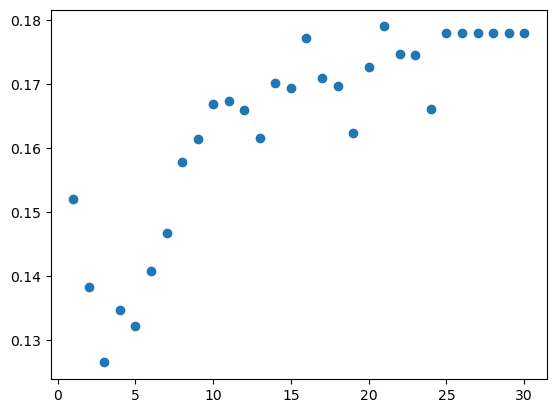

In [137]:
plt.scatter(max_depth, rmse)

In [154]:
min_split = np.arange(2, 60+1)
rmse = []

for split in min_split:
    regressor = DecisionTreeRegressor(random_state = 0, min_samples_split = split)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred, squared = False))

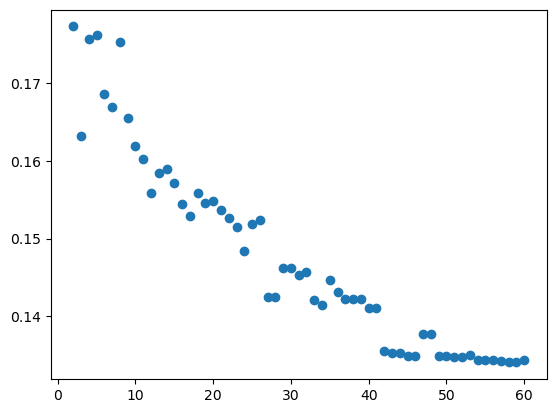

In [155]:
plt.scatter(min_split, rmse)

In [156]:
min_leaf = np.arange(2, 60+1)
rmse = []

for leaf in min_leaf:
    regressor = DecisionTreeRegressor(random_state = 0, min_samples_leaf = leaf)  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    rmse.append(mean_squared_error(y_test, y_pred, squared = False))

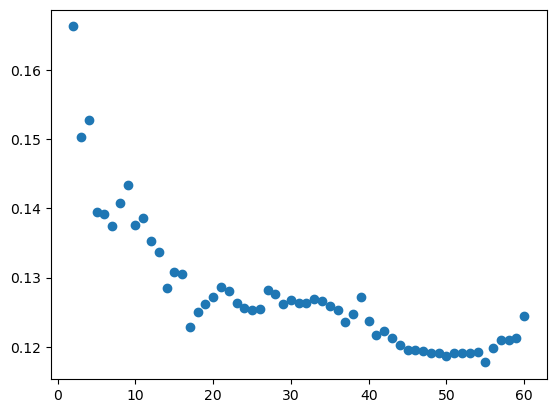

In [157]:
plt.scatter(min_split, rmse)

In [163]:
regressor = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 45)  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(regressor.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred, squared = False))

0.6157601754323201
0.11957790897329403


In [158]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(reg.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred, squared = False))

0.569065640272691
0.12663545894237294


Running Genetic Algorithm